In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def assess_outliers(data):
    plt.figure(figsize=(20, 7))
    sns.boxplot(data=data)
    plt.xticks(rotation=45)
    plt.show()

def treat_outliers(data):
    df = data.copy()
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df[col] = df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
    return df


Before Outlier Treatment


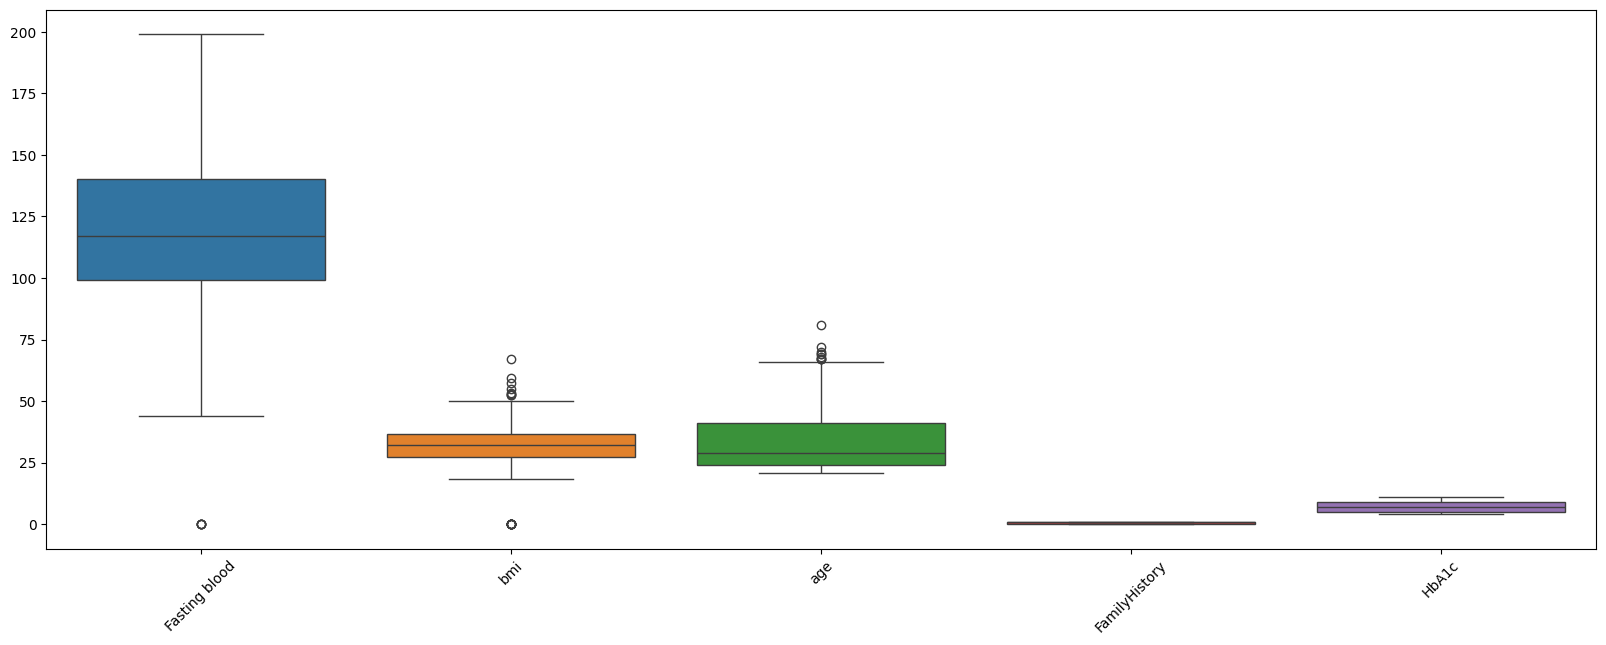

After Outlier Treatment


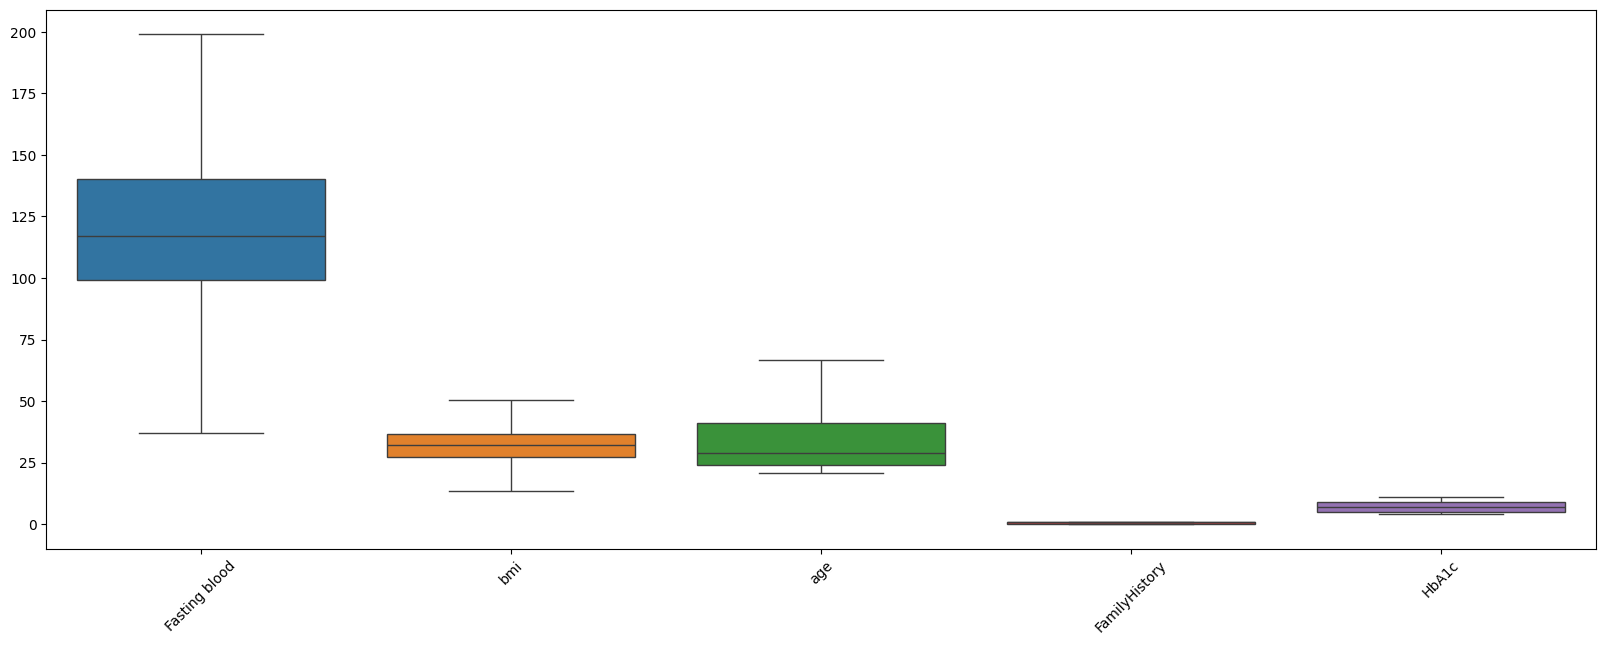

In [25]:
import pandas as pd

url = "https://github.com/Madhavan1232/Advance_ML/raw/refs/heads/main/ClassWorks/Day2/concepts/c2/ML470_S2_Diabetes_Data_Concept.xlsx"
df = pd.read_excel(url)

cols = ['Glucose', 'BMI', 'Age', 'FamilyHistory', 'HbA1c']
df_viz = df[cols].rename(columns={'Glucose': 'Fasting blood', 'BMI': 'bmi', 'Age': 'age'})

print("Before Outlier Treatment")
assess_outliers(df_viz)

df_treated = treat_outliers(df_viz)

print("After Outlier Treatment")
assess_outliers(df_treated)